## 라이브러리 불러오기
- spark 세션 활성화

In [2]:
from pyspark.sql import SparkSession

# 스파크 세션을 활성화한다.
spark = SparkSession.builder.master("local[2]").appName("DF").getOrCreate()
spark

## 데이터 프레임 생성
- pairRDD 형태를 스파크 데이터프레임으로 생성
- 스파크 데이터프레임 != 판다스 데이터프레임
- 스파크 <> 판다스
- 참조 : https://spark.apache.org/docs/3.2.0/api/python/getting_started/quickstart_df.html

In [3]:
pairRDD = [('김길동', 25), ('홍길동', 30), ('John', 20), ('Jim', 30)]

temp_df = spark.createDataFrame(pairRDD, schema = ["Name", "Age"])
print(temp_df)
print(type(temp_df))

DataFrame[Name: string, Age: bigint]
<class 'pyspark.sql.dataframe.DataFrame'>


In [4]:
col_names = ["Name", "Age"]

tmep_df2 = spark.createDataFrame(pairRDD, col_names)
print(tmep_df2)
print(type(tmep_df2))

DataFrame[Name: string, Age: bigint]
<class 'pyspark.sql.dataframe.DataFrame'>


In [5]:
tmep_df2.show()

+------+---+
|  Name|Age|
+------+---+
|김길동| 25|
|홍길동| 30|
|  John| 20|
|   Jim| 30|
+------+---+



## 데이터 불러오기
- 외부 csv 파일 불러오기

In [7]:
DATA_PATH = '/home/human/wsl2_pyspark/data/people.csv'

## 스파크 데이터프레임 생성
ppl_df = spark.read.csv(DATA_PATH, header=True, inferSchema=True)
ppl_df.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|     

22/11/08 14:12:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , person_id, name, sex, date of birth
 Schema: _c0, person_id, name, sex, date of birth
Expected: _c0 but found: 
CSV file: file:///home/human/wsl2_pyspark/data/people.csv


- 행의 갯수 파악

In [8]:
ppl_df.count()

100000

- 컬럼 갯수 및 컬럼명 추출

In [10]:
print(len(ppl_df.columns))
print(ppl_df.columns)

5
['_c0', 'person_id', 'name', 'sex', 'date of birth']


## 데이터 핸들링
- 특정 컬럼 추출

In [11]:
ppl_df_2 = ppl_df.select("name", "sex", "date of birth")
ppl_df_2.show(5)

+--------------+------+-------------+
|          name|   sex|date of birth|
+--------------+------+-------------+
|Penelope Lewis|female|   1990-08-31|
| David Anthony|  male|   1971-10-14|
|     Ida Shipp|female|   1962-05-24|
|  Joanna Moore|female|   2017-03-10|
|Lisandra Ortiz|female|   2020-08-05|
+--------------+------+-------------+
only showing top 5 rows



- 중복값 제거

In [13]:
ppl_df_2.count()

100000

In [14]:
ppl_df_3 = ppl_df_2.dropDuplicates()
ppl_df_3.count()

99998

- 행 추출 (filter)

In [15]:
# 성별로 구분
male_df = ppl_df_3.filter(ppl_df_3.sex == "male")
female_df = ppl_df_3.filter(ppl_df_3.sex == "female")

male_df.count(), female_df.count()

(49065, 49013)

## Spark SQL
- 임시 테이블을 생성

In [17]:
# Spark 세션에 people 테이블로 저장
ppl_df_3.createOrReplaceTempView("people")

In [18]:
query = '''
    select name FROM people
'''

# 쿼리
sql_names = spark.sql(query)
sql_names.show(10)

+-----------------+
|             name|
+-----------------+
|      Robert Fort|
|    Robert Wright|
|     Ollie Watson|
|      Todd Noland|
| Brandon Lawrence|
|     Bobbie Clark|
|    Clifton Negri|
|        Dina Katz|
|Lillian Whitfield|
|    Manuel Castro|
+-----------------+
only showing top 10 rows



In [25]:
query = '''
    select * from people where sex == "male"
'''

slq_male_df = spark.sql(query)
print(slq_male_df.show(10))
print(slq_male_df.count(), male_df.count())

+-------------------+----+-------------+
|               name| sex|date of birth|
+-------------------+----+-------------+
|        Robert Fort|male|   1975-02-15|
|      Robert Wright|male|   1974-10-11|
|        Todd Noland|male|   2010-11-30|
|   Brandon Lawrence|male|   1972-09-15|
|      Clifton Negri|male|   1971-10-28|
|      Manuel Castro|male|   2000-01-09|
|    Bradley Aguilar|male|   1950-01-01|
|Christopher Mchaney|male|  20175-02-28|
|      David Maenpaa|male|   1975-02-05|
|    Justin Franklin|male|   2017-03-11|
+-------------------+----+-------------+
only showing top 10 rows

None
49065 49065


## 업그레이드 된 Spark DataFrame

In [27]:
DATA_PATH = "/home/human/wsl2_pyspark/data/Real_Estate.csv"

real_estate = spark.read.csv(DATA_PATH, header=True, inferSchema=True)

# real_estate.show(2) 너무 큼
real_estate.count()

5000

In [28]:
len(real_estate.columns)

74

- real_estate 컬럼값 출력

In [29]:
print(real_estate.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

In [30]:
y_df = real_estate.select(["SalesClosePrice"])
y_df.show(5)

+---------------+
|SalesClosePrice|
+---------------+
|         143000|
|         190000|
|         225000|
|         265000|
|         249900|
+---------------+
only showing top 5 rows



- 기술통계량

In [31]:
y_df.describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



- 데이터 타입 출력

In [33]:
df_type_lists = real_estate.dtypes
print(df_type_lists)

[('No.', 'int'), ('MLSID', 'string'), ('StreetNumberNumeric', 'int'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'int'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'int'), ('LISTDATE', 'string'), ('LISTPRICE', 'int'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'int'), ('offmarketdate', 'string'), ('Fireplaces', 'int'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'int'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('UNITNUMBER', 'string'), ('YEARBUILT', 'i

In [40]:
# 테이블 정의서에 기록되어 있는 데이터 타입

validation_dict ={
    "AssociationFee" : "int",
    "ZONING" : "string",
    "RoomArea6" : "string",
    "AssessedValuation" : "double"
}

for df_type in df_type_lists:
    # print(df_type)
    
    # 데이터 타입을 검증
    column_name = df_type[0]
    
    if column_name in validation_dict:
        # print(column_name)
        
        # 비교
        column_type = df_type[1]
        if column_type == validation_dict[column_name]:
            print(column_name + ": 데이터 타입 일치")
        else :
            print(column_name + ": 데이터 타입 불일치")

ZONING: 데이터 타입 일치
RoomArea6: 데이터 타입 일치
AssociationFee: 데이터 타입 일치
AssessedValuation: 데이터 타입 일치


In [41]:
col_names = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes']

# 상관관계 최대갓 정의
corr_max = 0
corr_max_col = col_names[0]

# 상관관계 구하기
for col in col_names:
    
    # 종속변수 기준으로 상관관계가 가장 큰 변수 구하기
    # 스파크 데이터프레임
    # 데이터 엔지니어 (실시간 데이터 처리)
    # 
    corr_val = real_estate.corr('SalesClosePrice', col)
    print(col, corr_val)
   
    if corr_val > corr_max:
        
        corr_max = corr_val
        corr_max_col = col

print("-----" * 2)
print(corr_max_col, corr_max)

FOUNDATIONSIZE 0.6152231695664402
DAYSONMARKET 0.10140339667725148
Fireplaces 0.5750292168651635
PDOM 0.06577733329086234
SQFTABOVEGROUND 0.7901878498502957
Taxes 0.04330623090283576
----------
SQFTABOVEGROUND 0.7901878498502957


## Pandas 데이터 프레임으로 변환

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sample_df = real_estate.select(["SalesClosePrice"]).sample(False, 0.5, 42)
print(sample_df.show(5))
print(sample_df.count())

+---------------+
|SalesClosePrice|
+---------------+
|         265000|
|         245000|
|         254500|
|         257500|
|         274990|
+---------------+
only showing top 5 rows

None
2552


In [45]:
pandas_df = sample_df.toPandas()
pandas_df.head()

,SalesClosePrice
0,265000
1,245000
2,254500
3,257500
4,274990


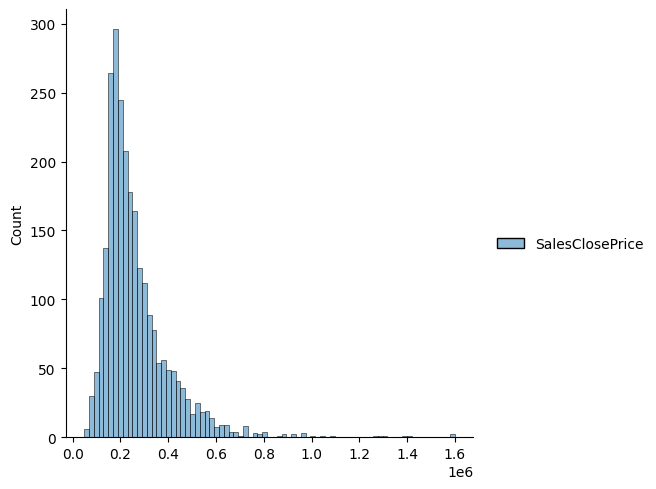

In [46]:
# 그래프 작성
sns.displot(pandas_df) 
plt.show()

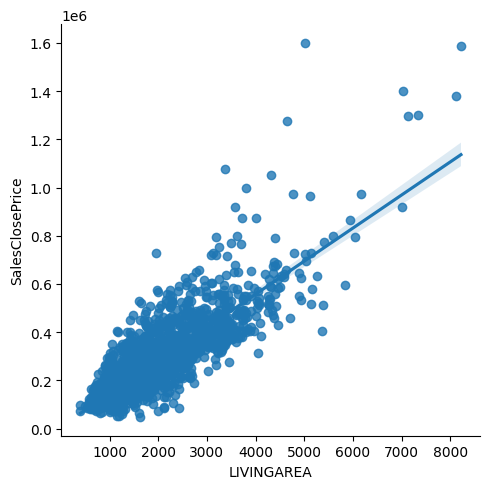

In [47]:
# 회귀 그래프 작성
sample_df = real_estate.select(['SalesClosePrice', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# 선형회귀 모델
sns.lmplot(x='LIVINGAREA', y='SalesClosePrice', data=pandas_df)
plt.show()